The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
fs: 48000
Detected Fundamental: 750.00 Hz
3rd harmonic RMS 0.236
Total thd: 41.55502235444523
1/f_carrier = 0.0001 => 4.8
fs: 48000.0
480000
n=-2: peak at 9800.0 Hz with amplitude 0.3000
n=-1: peak at 9900.0 Hz with amplitude 0.5000
carrer at n=0: peak at 10000.0Hz with amplitude 0.8000
n=1: peak at 10100.0 Hz with amplitude 0.5000
n=2: peak at 10200.0 Hz with amplitude 0.3000
freq res: 0.1
calculated TIMD: 0.71774
TIMD %: 71.77%


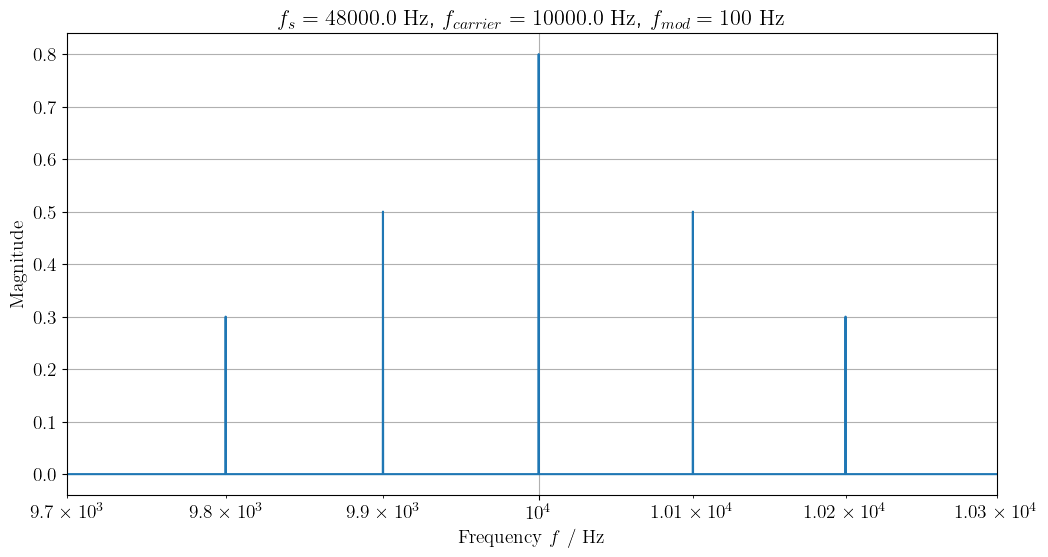

In [99]:
%load_ext autoreload
%autoreload 2
import util
import scipy as sp
import numpy as np 
import matplotlib.pyplot as plt 

# 0.5 and 0.3 - 1500 hz and 75
# timd: 0.4351
# rms: 0.353
# rms: 


## check THD_R function
fs, data = util.load_wav("data/square1.wav", normalize=True)
print(f"fs: {fs}")
thd_val, harm_dict = util.thd_r(data, fs, max_harmonic=19)

rms_3rd = harm_dict.get(3, 0.0)
print(f"3rd harmonic RMS {rms_3rd:.3f}")
print(f"Total thd: {thd_val * 100}")


## check TIMD function
f_carrier = 10e3
f_mod = 100
fs = 48e3 #int(f_carrier*3)
print(f"1/f_carrier = {1/f_carrier} => {fs*1/f_carrier}")

print(f"fs: {fs}")
fs, signal = util.generate_timd_signal(f_carrier, f_mod, amplitudes=[0.8,0.5,0.3], fs=fs, duration=10)
timd_val = util.timd(signal, fs, f_mod=f_mod, f_carrier=f_carrier, n_max=3, search_window=1)

print(f"freq res: {fs/len(signal)}")
print(f"calculated TIMD: {timd_val:.5f}")
print(f"TIMD %: {timd_val * 100:.2f}%")

# plt.figure()
# plt.plot(signal)

util.plot_spectrum(signal, fs, rms=False, title=f"$f_{{s}} = {fs}$ \\textrm{{Hz}}, $f_{{carrier}} = {f_carrier}$ \\textrm{{Hz}}, $f_{{mod}} = {f_mod}$ \\textrm{{Hz}}", xlim=(f_carrier-3*f_mod, f_carrier+3*f_mod), xlabel="\\textrm{Frequency} $f$ \\textrm{/ Hz}", ylabel="\\textrm{Magnitude}", save="figures/timd_test.svg")

# Theoretical THD of square wave

In [101]:

# Harmonics 3, 5, 7 ... 19
harmonics = np.arange(3, 20, 2)
amplitudes = 1.0 / harmonics
print(harmonics)
sum_squares_dist = np.sum(amplitudes**2)
sum_squares_total = 1.0**2 + sum_squares_dist

thd_f = np.sqrt(sum_squares_dist) / 1.0
thd_r = np.sqrt(sum_squares_dist) / np.sqrt(sum_squares_total)

print(f"Theoretical THD (IEC / Fundamental): {thd_f*100:.2f}%")
print(f"Theoretical THD_R (Your Code / RMS): {thd_r*100:.2f}%")

[ 3  5  7  9 11 13 15 17 19]
Theoretical THD (IEC / Fundamental): 45.69%
Theoretical THD_R (Your Code / RMS): 41.55%


carrier: 10000.0 Hz, modulator: 500 Hz)
n=-2: peak at 9000.0 Hz with amplitude 0.0489
n=-1: peak at 9500.0 Hz with amplitude 0.0975
carrer at n=0: peak at 10000.0Hz with amplitude 0.7779
n=1: peak at 10500.0 Hz with amplitude 0.0970
n=2: peak at 11000.0 Hz with amplitude 0.0483
calculated TIMD: 0.19387
TIMD %: 19.39%
